In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"C:\Users\ADMIN\Desktop\Data Projects\Airbnb+Data_Mavern\Airbnb Data\Listings.csv", low_memory=False,encoding="ISO-8859-1")

In [25]:
#df.info()

In [5]:
#Casting  anydate column to a datetime

df['host_since'] = pd.to_datetime(df['host_since'])


In [50]:
# Filter Paris Only

In [6]:
pd.set_option('display.max_columns', 34)

In [7]:
df2 = df[df['city'] == 'Paris']

In [59]:
# Only want these columns; host_since, neighbourhood, city, Accomodates, Price

In [8]:
df3= df2[['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]


In [9]:
df3.head(5)

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60


In [ ]:
# Check for null values

In [67]:
df3.isnull().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [10]:
df3.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [73]:
df3.head(10)

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60
5,2011-04-13,Temple,Paris,2,95
6,2013-08-09,Popincourt,Paris,2,80
7,2013-04-14,Popincourt,Paris,2,59
8,2015-06-14,Buttes-Chaumont,Paris,2,80
9,2014-09-02,Opera,Paris,2,90


In [12]:
Paris_Listing_Neighbourhood = df3.groupby('neighbourhood').agg({'price': 'mean'}).sort_values(by='price', ascending=True)

In [27]:
Paris_Listing_Neighbourhood.tail()

,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.856578
Passy,161.144635
Louvre,175.379972
Elysee,210.536765


In [41]:
paris_listings_accomodations=df3.query("neighbourhood =='Elysee'").groupby('accommodates').agg({'price': 'mean'}).sort_values(by = 'price', ascending = True)

In [43]:
paris_listings_accomodations.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [48]:
paris_listing_over_time = (df3
                           .set_index('host_since')
                           .resample('Y')
                           .agg({'neighbourhood': 'count', 'price': 'mean'})    
)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5476\3094141101.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  .resample('Y')


In [50]:
paris_listing_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


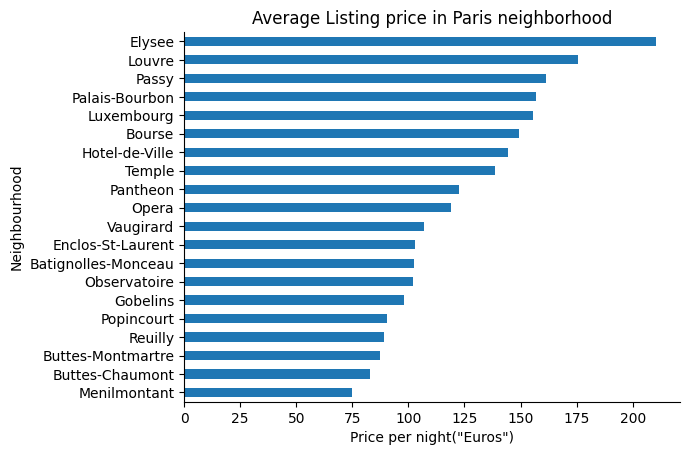

In [63]:
Paris_Listing_Neighbourhood.plot(kind = 'barh', title = 'Average Listing price in Paris neighborhood',
                                 xlabel='Price per night("Euros")',
                                ylabel='Neighbourhood',
                                legend=None)
sns.despine()

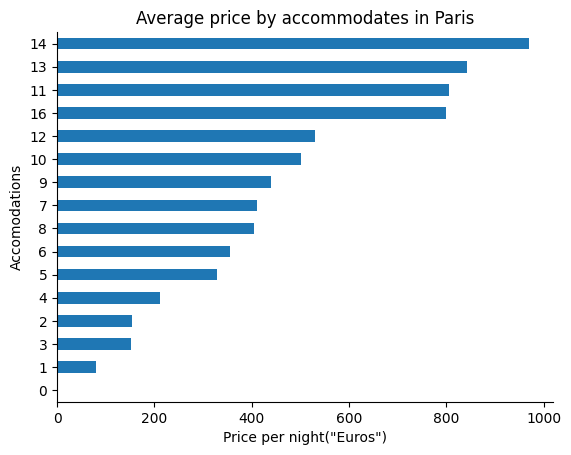

In [69]:
paris_listings_accomodations.plot.barh(title='Average price by accommodates in Paris',
                                      xlabel='Price per night("Euros")',
                                       ylabel='Accomodations',
                                       legend=None)
sns.despine()

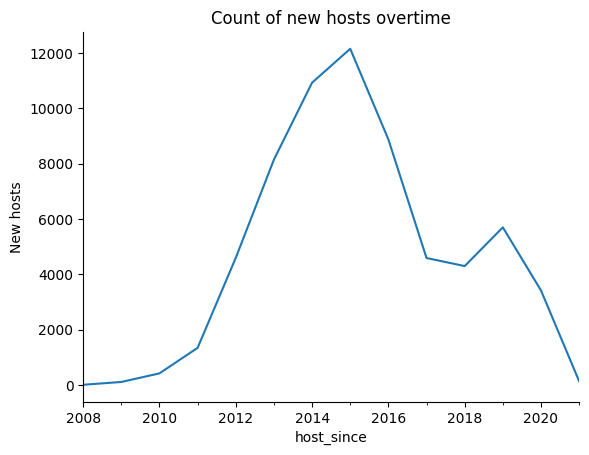

In [76]:
paris_listing_over_time['neighbourhood'].plot(ylabel='New hosts',title='Count of new hosts overtime')
sns.despine()

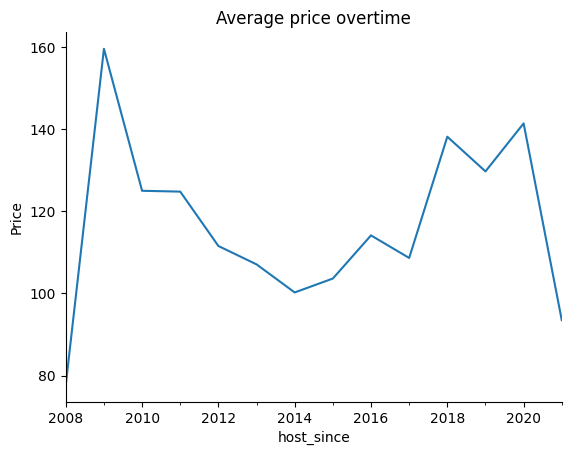

In [80]:
paris_listing_over_time['price'].plot(title='Average price overtime',ylabel='Price')
sns.despine()

Text(0, 0.5, 'Average price')

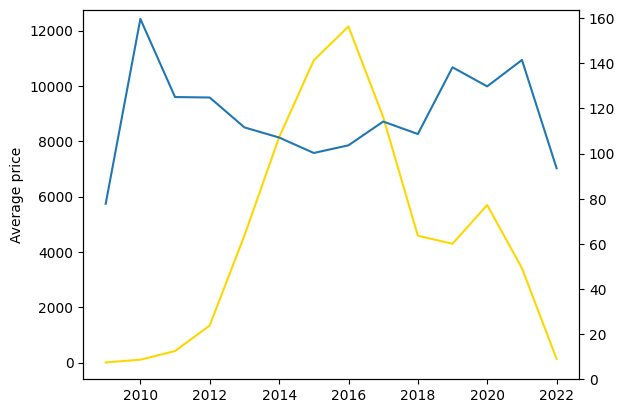

In [88]:
fig, ax=plt.subplots()
ax.plot(
    paris_listing_over_time.index,
    paris_listing_over_time["neighbourhood"],
    label="New hosts",
    c="gold"
)
ax.set_ylabel("New hosts")
ax2=ax.twinx()
ax2.plot(
    paris_listing_over_time.index,
    paris_listing_over_time["price"],
    label="Average price",    
)
ax2.set_ylim(0)
ax.set_ylabel("Average price")